In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

import sys
sys.path.append('../')
from src import data

from netneurotools import metrics 

import mne
plt.rcParams['figure.figsize'] = [10, 5]

%matplotlib inline

!date -I

2024-03-03


In [2]:
empirical = np.load(data.path('external/pytepfit/source_estimates/empirical.npz'))
empirical['ts'].shape

(400, 200)

In [3]:
simulated = np.load(data.path('external/pytepfit/source_estimates/simulated.npz'))
simulated['ts'].shape

(400, 200)

In [4]:
empirical['labels'][:10]

array(['7Networks_LH_Cont_Cing_1-lh', '7Networks_LH_Cont_Cing_2-lh',
       '7Networks_LH_Cont_PFCl_1-lh', '7Networks_LH_Cont_PFCl_2-lh',
       '7Networks_LH_Cont_PFCl_3-lh', '7Networks_LH_Cont_PFCl_4-lh',
       '7Networks_LH_Cont_PFCl_5-lh', '7Networks_LH_Cont_PFCl_6-lh',
       '7Networks_LH_Cont_Par_1-lh', '7Networks_LH_Cont_Par_2-lh'],
      dtype='<U40')

In [5]:
empirical['labels'].shape

(200,)

In [6]:
empirical['labels'][:10]

array(['7Networks_LH_Cont_Cing_1-lh', '7Networks_LH_Cont_Cing_2-lh',
       '7Networks_LH_Cont_PFCl_1-lh', '7Networks_LH_Cont_PFCl_2-lh',
       '7Networks_LH_Cont_PFCl_3-lh', '7Networks_LH_Cont_PFCl_4-lh',
       '7Networks_LH_Cont_PFCl_5-lh', '7Networks_LH_Cont_PFCl_6-lh',
       '7Networks_LH_Cont_Par_1-lh', '7Networks_LH_Cont_Par_2-lh'],
      dtype='<U40')

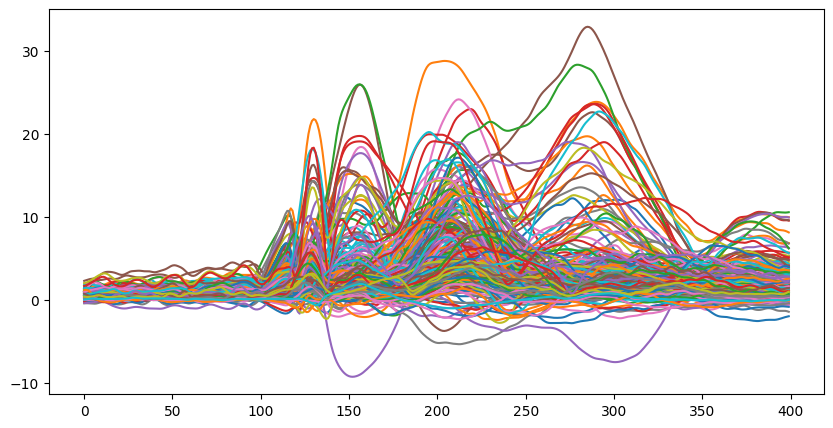

In [7]:
# baseline beru jen do 80, ne 99 jako ve svém ntb - TODO zkusit různé ve svém

baseline_correction_mode = 'zscore'
#corrected_empirical = mne.baseline.rescale(empirical['ts'].T, np.array([i for i in range(400)]), (0,80), mode=baseline_correction_mode).T

corrected_empirical = empirical['ts']

plt.plot(corrected_empirical);

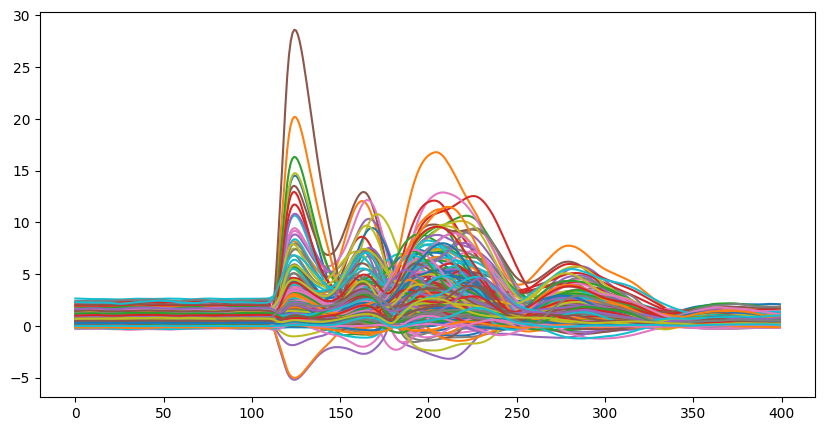

In [8]:
baseline_correction_mode = 'zscore'
#corrected_simulated = mne.baseline.rescale(simulated['ts'].T, np.array([i for i in range(400)]), (0,80), mode=baseline_correction_mode).T
corrected_simulated = simulated['ts']


plt.plot(corrected_simulated);

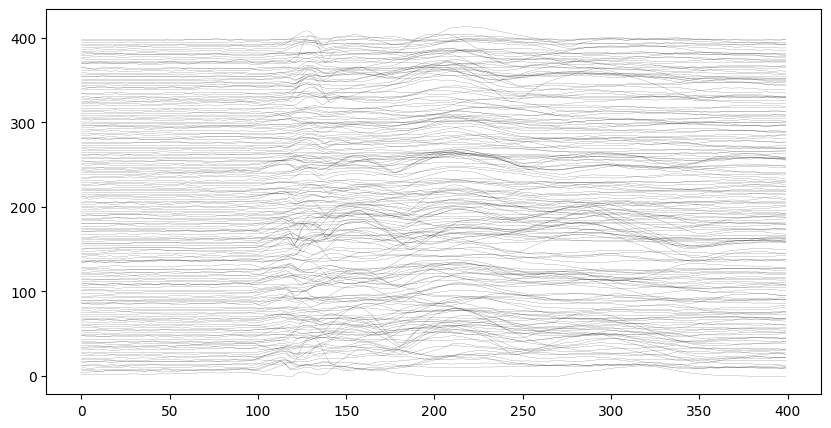

In [9]:
plt.plot(corrected_empirical * 2 + np.arange(200)*2, 'k-', lw=0.1);

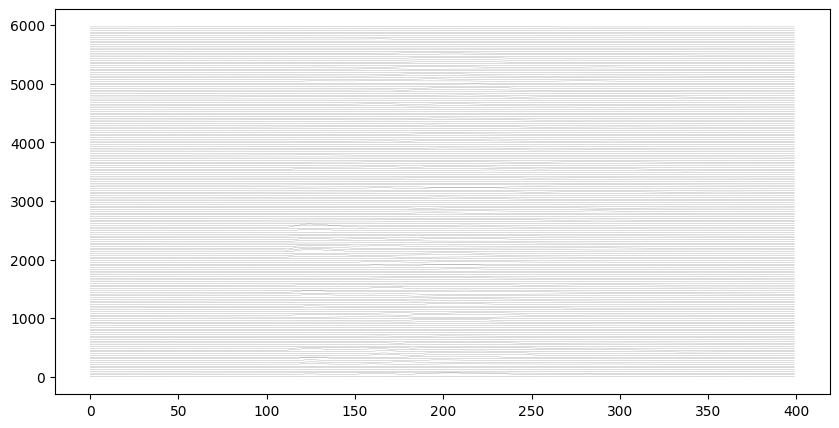

In [10]:
plt.plot( corrected_simulated * 2 + np.arange(200) *30, 'k-', lw=0.1);

In [11]:
stim_locatin = empirical['stim_location']
print(stim_locatin)

85


In [12]:
SC_W, SC_L, FC = data.load_pytepfit_sc()

SC_L = np.where(SC_W == 0,np.nan,SC_L)

/tmp/ipykernel_26369/3017092137.py:4: RuntimeWarning: divide by zero encountered in log
  axs[0].matshow(np.log(SC_W))


Text(0.5, 1.0, 'Structural connectivity - lengths (log)')

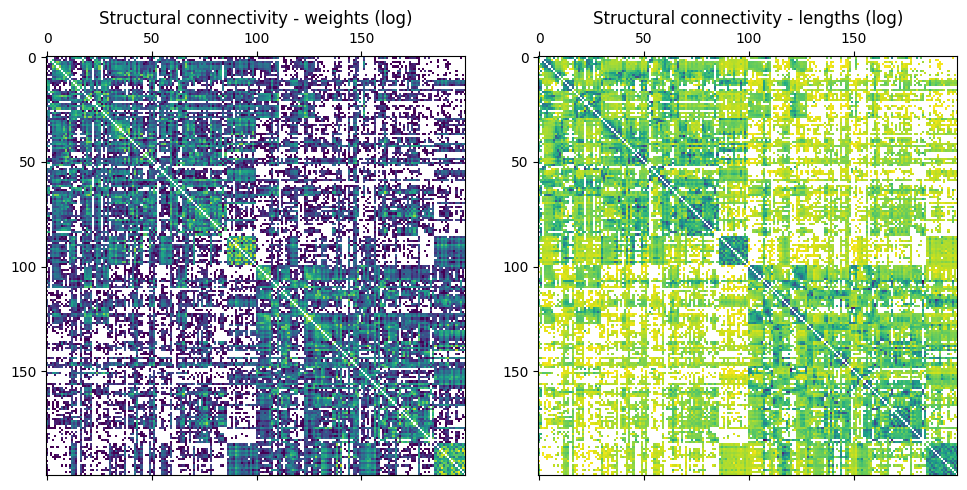

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].matshow(np.log(SC_W))
axs[0].set_title("Structural connectivity - weights (log)")
axs[1].matshow(np.log(SC_L))
axs[1].set_title("Structural connectivity - lengths (log)")

Text(0.5, 1.0, 'ROI distances')

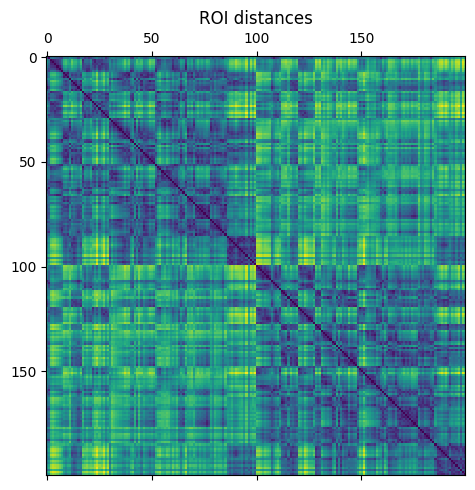

In [14]:
ED = data.schaefer_roi_distances(200)

fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.matshow(ED)
axs.set_title("ROI distances")

In [15]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [25]:
n_roi = empirical['ts'].shape[1]

def plot(roi):
    fig, ax = plt.subplots()
    ax.plot( corrected_empirical[:,roi], label='empirical');
    ax.plot( corrected_simulated[:,roi], label='simulated');
    ax.set_ylim([-10,30])
    plt.plot([100,100], [-5,5], color="r")
    ax.legend(title=f'roi {roi}')

interact(plot, roi=widgets.IntSlider(max=n_roi-1))

interactive(children=(IntSlider(value=0, description='roi', max=199), Output()), _dom_classes=('widget-interac…

<function __main__.plot(roi)>

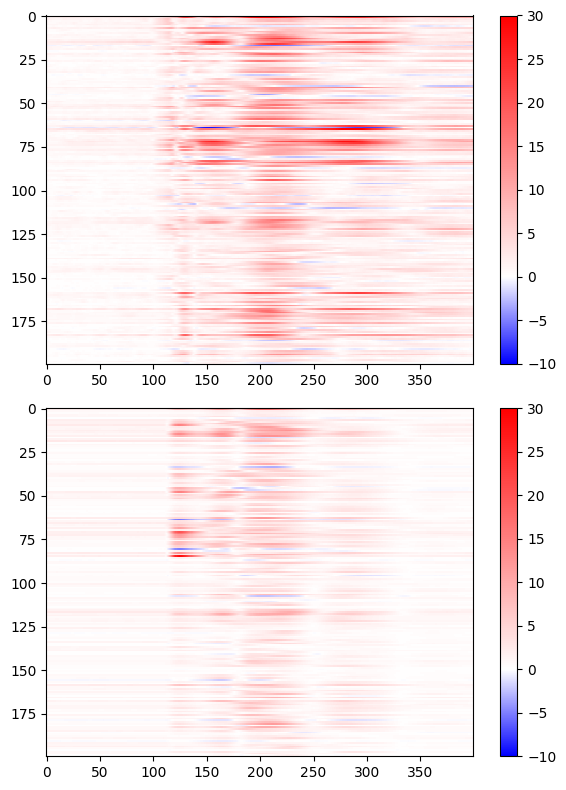

In [17]:
fig, axs = plt.subplots(nrows=2, figsize=(6,8))

from matplotlib import colors
kwds = dict(interpolation='none', aspect='auto', cmap='bwr', norm=colors.TwoSlopeNorm(vmin=-10, vmax=30, vcenter=0.))

for ax, ts in zip(axs.flatten(), [corrected_empirical.T, corrected_simulated.T]):
    im = ax.imshow(ts, **kwds)
    cb = plt.colorbar(im, ax=ax)
    cb.ax.set_yscale('linear') # 😡

fig.tight_layout()

In [18]:
def plot(thr,ts,stim_loc):
    # m = np.mean(ts[:80,:])
    # v = np.std(ts[:80,:])
    plt.rcParams['figure.figsize'] = [10,8]

    plt.imshow(
        ts.T > thr, # buď tohle nebo řádek níže
        # ((ts - m)/v).T > thr*v,
        aspect='auto',  cmap='binary', extent=[0,400,0,200])
    plt.hlines(stim_loc,0,100,'g')
    plt.plot([100,100], [0,200], color="r")

In [19]:
interact(plot, thr=widgets.IntSlider(max=400, min=1), ts = fixed(corrected_empirical),stim_loc=fixed(stim_locatin))

interactive(children=(IntSlider(value=1, description='thr', max=400, min=1), Output()), _dom_classes=('widget-…

<function __main__.plot(thr, ts, stim_loc)>

In [20]:
interact(plot, thr=widgets.IntSlider(max=40, min=1),ts=fixed(corrected_simulated),stim_loc=fixed(stim_locatin))

interactive(children=(IntSlider(value=1, description='thr', max=40, min=1), Output()), _dom_classes=('widget-i…

<function __main__.plot(thr, ts, stim_loc)>

In [21]:
arg = np.argsort(ED[stim_locatin])
arg_stim_loc = np.where(arg==stim_locatin)[0][0]
interact(plot, thr=widgets.IntSlider(max=100, min=1),ts=fixed(corrected_simulated[:,arg]),stim_loc=fixed(0))

interactive(children=(IntSlider(value=1, description='thr', min=1), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(thr, ts, stim_loc)>

In [22]:
arg = np.argsort(SC_W[stim_locatin])
arg_stim_loc = np.where(arg==stim_locatin)[0][0]
interact(plot, thr=widgets.IntSlider(max=100, min=1),ts=fixed(corrected_simulated[:,arg]),stim_loc = fixed(0))

interactive(children=(IntSlider(value=1, description='thr', min=1), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(thr, ts, stim_loc)>

In [23]:
arg = np.argsort(SC_L[stim_locatin])
interact(plot, thr=widgets.IntSlider(max=100, min=1),ts=fixed(corrected_simulated[:,arg]),stim_loc = fixed(0))

interactive(children=(IntSlider(value=1, description='thr', min=1), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(thr, ts, stim_loc)>

In [24]:
a = np.array([1,2,4,3,np.nan,6,np.nan])

sort = np.argsort(a)
a[sort]

array([ 1.,  2.,  3.,  4.,  6., nan, nan])